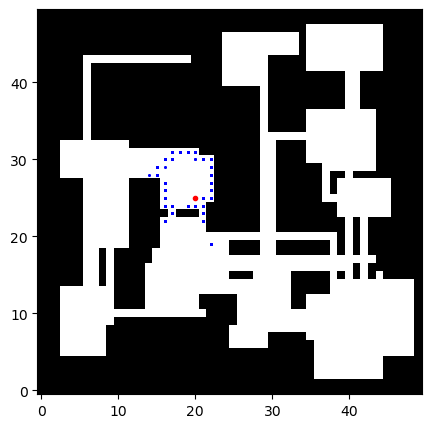

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
from config import rmax , aplha , beta


class Sensor:
    def __init__(self, robot_position, map_matrix):
        """Initialize sensors.
        
        Params
        ======
            robot_position (tuple): [y_robot, x_robot, theta_robot]
            map_matrix (numpy array): matrix representing the map
        """
        self.fov = np.pi
        self.angle_step = 0.008
        self.meas_phi = np.arange(0, 2*self.fov, self.angle_step)
        self.rmax = rmax
        self.robot_position = robot_position
        self.map_matrix = map_matrix
        self.map_height, self.map_width = map_matrix.shape

    def get_LIDAR_measurement(self):
        meas_r = np.ones(self.meas_phi.shape)
        for i in range(len(self.meas_phi)):
            for r in range(1,rmax):
                x_i = self.robot_position[1] + (r*np.cos(self.robot_position[2]+meas_phi[i])).astype(int)
                y_i = self.robot_position[0] + (r*np.sin(self.robot_position[2]+meas_phi[i])).astype(int)
                if (x_i >= 0) & (x_i < self.map_width ) & (y_i >= 0) & (y_i < self.map_height):
                    if self.map_matrix[y_i,x_i] == 1:
                        break
                    meas_r[i] = r
        return meas_r


from map_generator import Map_Generator 
generator = Map_Generator(42)
map_matrix = generator.ref_map()


robot_position = [25,20,0]

LIDAR = Sensor(robot_position,map_matrix)
meas_r = LIDAR.get_LIDAR_measurement()
meas_phi = np.arange(0,2*np.pi,0.008)



x_i = robot_position[1] + (meas_r*np.cos(robot_position[2]+meas_phi)).astype(int)
y_i = robot_position[0] + (meas_r*np.sin(robot_position[2]+meas_phi)).astype(int)
plt.figure(figsize=(5, 5))
plt.imshow(np.subtract(1,map_matrix), cmap='gray', vmin=0, vmax=1,origin='lower')
plt.plot(robot_position[1],robot_position[0],'o',color="red",markersize=3)
plt.plot(x_i,y_i,'o',color="blue",markersize=1)
plt.show()